### Homework №5

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


____________________________________________________________________________________________

In [28]:
def rng(m=2**32, a=1103515245, c=12345):
    rng.current = (a * rng.current + c) % m
    return rng.current / m

rng.current = 1

In [29]:
def rng_bad(m=2**31, a=65539, c=0):
    rng_bad.current = (a * rng_bad.current + c) % m
    return rng_bad.current / m
    
rng_bad.current = 1

In [3]:
samples = [rng() for _ in range(1000)]

____________________________________________________________________________________________

#### №1 
Поделим квадрат [0,1]*[0,1] на 10 частей и проверим хи-квадрат


In [6]:
k = 25
side = int(k**0.5)
step = 0

pointX = samples[::2]
pointY = samples[1::2]

x_ticks = np.linspace(0, 1, side + 1)

massiveCountsInSquare = np.zeros(k, dtype = int)
count = 0

for i in range(side):
    for j in range(side):
        count = 0

        for l in range(len(pointX)):
            if((x_ticks[i] <= pointX[l] <= x_ticks[i + 1]) and (x_ticks[j] <= pointY[l] <= x_ticks[j + 1])):
                count += 1
        
        massiveCountsInSquare[step] = count
        step += 1
        


f_exp = np.full(k, len(samples) // (2*k))
massiveCountsInSquare, f_exp, stats.chisquare(massiveCountsInSquare, f_exp)


(array([28, 13, 23, 20, 15, 18, 20, 23, 19, 23, 20, 13, 17, 21, 14, 17, 22,
        27, 16, 17, 22, 20, 23, 21, 28]),
 array([20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20,
        20, 20, 20, 20, 20, 20, 20, 20]),
 Power_divergenceResult(statistic=21.5, pvalue=0.6090827152142755))

### №2 
Будем считать количество порядков(те числа в одной серии в каком то отношении порядка)

1 - следующий меньше текущего 

0 - иначе

In [11]:
n = 1000
d = 200                              # рабили на d строк

newmassive = np.zeros(len(samples) - d)
j = 0

for i in range(0, n - 1):
    if(i % (n // d) == 0):
        continue

    if(samples[i] < samples[i + 1]):
        newmassive[j] = 0
    else:
        newmassive[j] = 1
    j += 1

newmassive = newmassive.reshape(d, -1)

f_obs = np.unique(newmassive, return_counts = True , axis = 0)[1]
f_exp = np.full(len(f_obs), n // np.math.factorial(n // d))

f_exp, f_obs, n // np.math.factorial(n // d)
f_obs, f_exp, stats.chisquare(f_obs, (np.sum(f_obs)/np.sum(f_exp))*f_exp)

(array([ 2,  5, 10,  7, 14, 28, 20,  5, 10, 16, 29, 17, 10, 20,  7]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8]),
 Power_divergenceResult(statistic=71.35, pvalue=1.0980722871413188e-09))

### №3
Подберем статистический тест

In [31]:
checkNorm = [rng() for _ in range(1000)]
checkBad = [rng_bad() for _ in range(30000)]

In [38]:
stats.kstest(checkBad, stats.uniform.cdf)

KstestResult(statistic=0.008437018050998446, pvalue=0.027777953265237354)

In [39]:
stats.kstest(checkNorm, stats.uniform.cdf)

KstestResult(statistic=0.0283867232911289, pvalue=0.3887430856707226)

### №4
Для начала нормируем веса для алгоритмы. Далее используем кумулятивная, чтобы создать функцию распределения по такой выборке.


In [15]:
def newDistribution(lenSample, distrib):
    resultOfproc = np.zeros(lenSample, dtype=int)
    for i in range(lenSample):
        elem = np.random.rand()
        j = 0
        while(elem >= distrib[j]):
            resultOfproc[i] += 1
            j += 1
    
    return resultOfproc
        
    

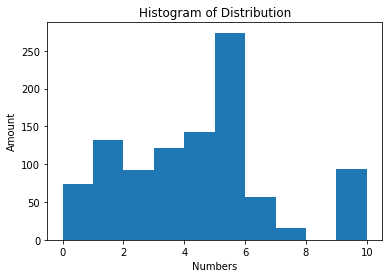

In [23]:
n = 1000
massiveWeights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
massiveWeights /= np.sum(massiveWeights)
F = np.cumsum(massiveWeights, dtype=np.double)

# __________
start_time_1 = time.time()

result = newDistribution(n, F)

end_time_1 = time.time() - start_time_1
# __________

plt.hist(result, range=(0, 10)) 
plt.xlabel('Numbers')
plt.ylabel('Amount')
plt.title('Histogram of Distribution')
plt.show()


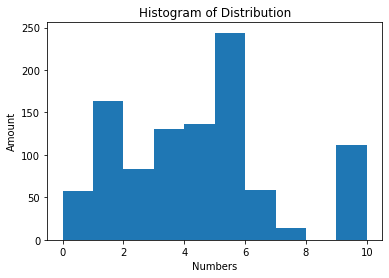

In [24]:
massiveWeights = np.array([0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2])
massiveWeights /= np.sum(massiveWeights)
getIndex = np.argsort(massiveWeights)
massiveWeights = np.sort(massiveWeights)
F = np.cumsum(massiveWeights, dtype=np.double)

# __________
start_time_2 = time.time()

result = newDistribution(n, F)

end_time_2 = time.time() - start_time_2
# __________

plt.hist(getIndex[result], range=(0, 10)) 
plt.xlabel('Numbers')
plt.ylabel('Amount')
plt.title('Histogram of Distribution')
plt.show()


In [27]:
print("Ускорили в ")
print(end_time_2 / end_time_1)

Ускорили в 
2.371220818982013


### №5 
Воспользуемся видом Exp(l) распределения и найдем его обратную, после подставим значения случ вел в найденную формулу. Возьмем параметр l = 1

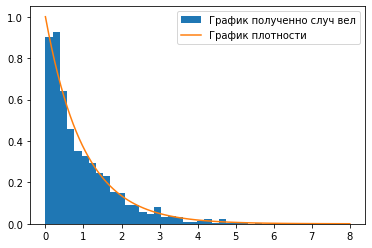

In [59]:
l = 1
randomVector = np.random.rand(1000)
reversDistrib = (-np.log(1 - randomVector)) / l

plt.hist(reversDistrib, 40, density=True,  label="График полученно случ вел")

X = np.linspace(0, 8, 100)
plt.plot(X, l*np.exp(-l*X), label="График плотности")

plt.legend()
plt.show()
